In [1]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from math import pi

In [2]:
def generate_axes_labels(plot_orbit):
    # Create time ticks, with the separation
    if plot_orbit.T > 5:
        timetick_step = np.max([np.min([100, (5 * 2**(np.max([int(np.log2(plot_orbit.T//2)) - 3,  1])))]), 5])
        yticks = np.arange(0, plot_orbit.T, timetick_step)
        ylabels = np.array([str(int(y)) for y in yticks])
    elif 0 < plot_orbit.T <= 5:
        scaled_T = np.round(plot_orbit.T, 1)
        yticks = np.array([0, plot_orbit.T])
        ylabels = np.array(['0', str(scaled_T)])
    else:
        plot_orbit.T = np.min([plot_orbit.L, 1])
        yticks = np.array([0, plot_orbit.T])
        ylabels = np.array(['0', '$\\infty$'])

    if plot_orbit.L > 2*pi*np.sqrt(2):
        xmult = (plot_orbit.L // 64) + 1
        xscale = xmult * 2*pi*np.sqrt(2)
        xticks = np.arange(0, plot_orbit.L, xscale)
        xlabels = [str(int((xmult*x) // xscale)) for x in xticks]
    else:
        scaled_L = np.round(plot_orbit.L / (2*pi*np.sqrt(2)), 1)
        xticks = np.array([0, plot_orbit.L])
        xlabels = np.array(['0', str(scaled_L)])

    return xticks, xlabels, yticks, ylabels

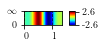

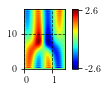

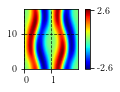

In [3]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(padded=False)
td[0].plot()
td[1].plot()
td[2].plot()

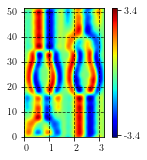

In [8]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(padded=False)
# td = tile_dictionary_ks()
symbol_array = np.array([[0, 1], [2, 2], [1, 0]])
tiled_orbit = tile(symbol_array, td, OrbitKS, stripwise=False).rescale(3).reshape().convert(to='modes')
tiled_orbit.plot()

In [5]:
result = converge(tiled_orbit, method='hybrid', verbose=True, scipy_kwargs={'maxiter':5})

-------------------------------------------------------------------------------------------------
Starting gradient descent
Initial residual : 968.0473195572263
Target residual tolerance : 1.024e-06
Maximum iteration number : 16384
Initial parameter values : (51.45253458515646, 28.407052270790462, 0)
-------------------------------------------------------------------------------------------------
#################################################
 Residual=0.1710508 after 5000 gradient descent steps. Parameters:(51.51382963897513, 28.40712881488805, 0)
#################################################
 Residual=0.0703379 after 10000 gradient descent steps. Parameters:(51.51567186439381, 28.40713314234155, 0)
#################################################
 Residual=0.0382296 after 15000 gradient descent steps. Parameters:(51.51600654625077, 28.40713480476474, 0)
#############-------------------------------------------------------------------------------------------------
Starting lsts

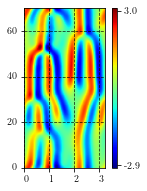

In [7]:
result.orbit.plot()

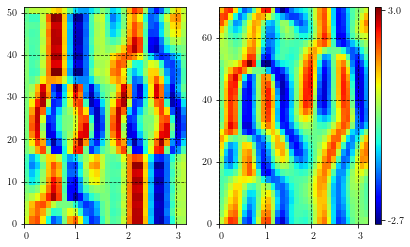

In [10]:
fig, axes = plt.subplots(1, 2)
ax1, ax2 = axes.flatten()
orbits = (tiled_orbit, result.orbit)
for ax, plot_orbit in zip(axes, orbits):
    plot_orbit = plot_orbit.convert(to='field')
    xticks, xlabels, yticks, ylabels = generate_axes_labels(plot_orbit)
    image = ax.imshow(plot_orbit.convert(to='field').state, extent=[0, plot_orbit.L, 0, plot_orbit.T],
                          cmap='jet', interpolation='none', aspect='auto')
    # Include custom ticks and tick labels
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xlabels, ha='left')
    ax.set_yticklabels(ylabels, va='center')
    ax.grid(True, linestyle='dashed', color='k', alpha=0.8)

    
# Custom colorbar values
maxu = round(np.max(plot_orbit.state.ravel()) - 0.1, 2)
minu = round(np.min(plot_orbit.state.ravel()) + 0.1, 2)

cbarticks = [minu, maxu]
cbarticklabels = [str(i) for i in np.round(cbarticks, 1)]
fig.subplots_adjust(right=0.95)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=0.075, pad=0.1)
cbar = plt.colorbar(image, cax=cax, ticks=cbarticks)
cbar.ax.set_yticklabels(cbarticklabels)
plt.show()

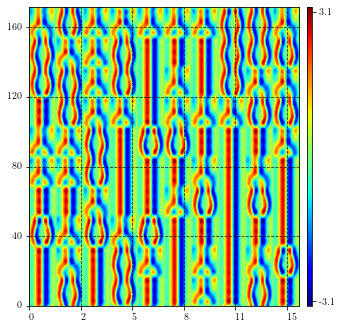

In [15]:
np.random.seed(0)
symbol_array = (3*np.random.rand(10,10)).astype(int)
t0 = time.time()
tiled_orbit = tile(symbol_array, td, OrbitKS, stripwise=False, gluing_order=(1,0)).reshape(64,256)
tiled_orbit.plot()

In [24]:
huge_tiling_result = converge(tiled_orbit, verbose=True, preconditioning=False)
huge_orbit = huge_tiling_result.orbit

-------------------------------------------------------------------------------------------------
Starting gradient descent
Initial residual : 192634.72931663372
Target residual tolerance : 1.6384e-05
Maximum iteration number : 65536
Initial parameter values : (171.50844861718815, 139.6804337382777, 0)
-------------------------------------------------------------------------------------------------
#################################################
 Residual=2552.1434689 after 5000 gradient descent steps. Parameters:(171.515324910289, 140.77530274781344, 0)
#################################################
 Residual=1989.9569503 after 10000 gradient descent steps. Parameters:(171.5220840763085, 141.3011437783983, 0)
#################################################
 Residual=1679.2341261 after 15000 gradient descent steps. Parameters:(171.5287713226021, 141.68143330559803, 0)
#################################################
 Residual=1467.4909364 after 20000 gradient descent steps. Par

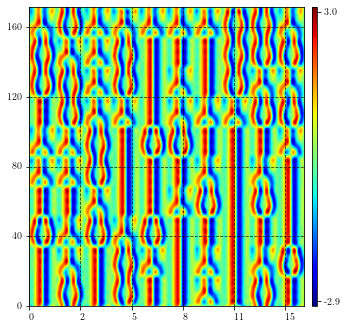

In [26]:
huge_orbit.plot()

In [25]:
huge_tiling_result = converge(tiled_orbit, verbose=True, preconditioning=True)
huge_orbit = huge_tiling_result.orbit

-------------------------------------------------------------------------------------------------
Starting gradient descent
Initial residual : 192634.72931663372
Target residual tolerance : 1.6384e-05
Maximum iteration number : 65536
Initial parameter values : (171.50844861718815, 139.6804337382777, 0)
-------------------------------------------------------------------------------------------------
#################################################
 Residual=31.5321363 after 5000 gradient descent steps. Parameters:(171.53625932261352, 139.68043402892857, 0)
###########

KeyboardInterrupt: 

In [22]:
huge_tiling_result = converge(tiled_orbit, method='l-bfgs-b', verbose=True, preconditioning=False, orbit_maxiter=1, scipy_kwargs={'tol':1e-4})
huge_orbit = huge_tiling_result.orbit

-------------------------------------------------------------------------------------------------
Starting l-bfgs-b optimization
Initial residual : 192634.72931663372
Target residual tolerance : 1.6384e-05
Maximum iteration number : 1
Initial parameter values : (171.50844861718815, 139.6804337382777, 0)
-------------------------------------------------------------------------------------------------
#Residual=27.096976405775308 after 1 l-bfgs-b iterations

Tolerance threshold met. Exiting with residual 27.096976405775308


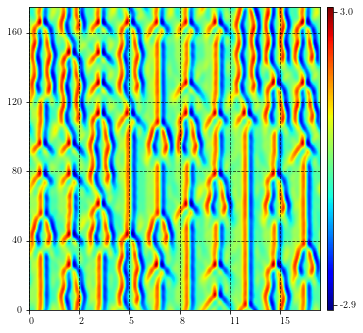

In [23]:
huge_orbit.plot()

In [ ]:
orbit0 = read_h5('OrbitKS_L31p245_T46p754.h5', basis='field')
orbit1 = read_h5('OrbitKS_L26p931_T41p266.h5', basis='field')
orbit2 = read_h5('OrbitKS_L37p297_T79p778.h5', basis='field')
orbit3 = read_h5('OrbitKS_L27p038_T23p329.h5', basis='field')

In [ ]:
tile_dict = {0: orbit0, 1: orbit1, 2: orbit2, 3: orbit3}

In [ ]:
tile_dict = rediscretize_tiling_dictionary(tile_dict, new_shape=(32,32))

In [ ]:
np.random.seed(22)
symbol_array = (4*np.random.rand(5,5)).astype(int)
symbol_array

In [51]:
?glue

In [ ]:
arbitrary_orbits = tile(symbol_array, tile_dict, OrbitKS,stripwise=True, gluing_order=(1,0))

In [ ]:
arbitrary_orbits.plot()

In [76]:
arbitrary_result = converge(arbitrary_orbits,verbose=True)

Starting gradient descent. Initial residual=95892.48040310101, target=2.5600000000000002e-05, max_iter=81920
#################################################
 Residual=28.5578938 after 5000 gradient descent iterations. Current parameter values:(237.26504666545148, 152.40200213196158, 0)
#################################################
 Residual=16.2459161 after 10000 gradient descent iterations. Current parameter values:(237.2704857663039, 152.40200216509456, 0)
#################################################
 Residual=11.8847530 after 15000 gradient descent iterations. Current parameter values:(237.27442646747767, 152.4020021845575, 0)
#################################################
 Residual=9.5985902 after 20000 gradient descent iterations. Current parameter values:(237.27757026097706, 152.4020021979566, 0)
#################################################
 Residual=8.1691763 after 25000 gradient descent iterations. Current parameter values:(237.28020822305933, 152.40200220794

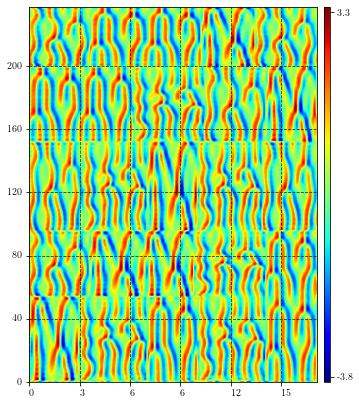

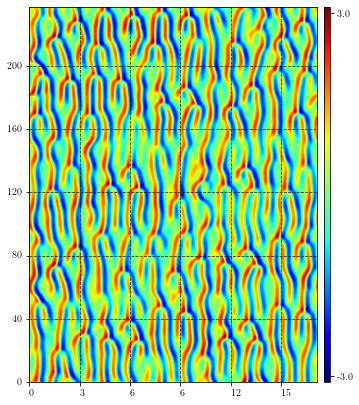

(None, None)

In [80]:
arbitrary_orbits.plot(), arbitrary_result.orbit.plot()